In [2]:
#Importing Libraries
#Importing Libraries
import numpy as np

import matplotlib.pyplot as plt         
#Matplotlib is a cross-platform, data visualization and graphical plotting library it offers a viable open source alternative to MATLAB.
#matplotlib.pyplot is a module in matplotlib used for plotting graphs and visualizations. It provides functions for creating various plots
#like line plots, scatter plots, histograms, etc.
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator




import all files]

In [3]:
path = "Dataset"
labelFile = 'label.csv'
batch_size_val=32
epochs_val =10
imageDimensions =(32,32,3)
testRatio = 0.2
validationRatio = 0.2

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd


path = "Dataset"
labelFile = 'label.csv'


count = 0
images = []
classNo = []
myList = os.listdir(path)

# Get total number of classes (subdirectories in the dataset)
print("Total Classes Detected:", len(myList))
noOfClasses = 43
print("Importing Classes.....")

# Image size (adjust as needed)
image_size = (32, 32)  # Resize to 32x32 pixels

#  from 0 to 42
for count in range(0, 43):
    folder_path = os.path.join(path, str(count))
    

    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist, skipping...")
        continue
    
    myPicList = os.listdir(folder_path)
    
    # Loop through each image in the folder
    for y in myPicList:
        curImg = cv2.imread(os.path.join(folder_path, y))
        
     
        if curImg is None:
            print(f"Failed to load image: {y}, skipping...")
            continue
        
    
        curImg = cv2.resize(curImg, image_size)
        
       
        images.append(curImg)
        classNo.append(count)
    
    print(count, end=" ")

print(" ")

# Convert images and classNo to NumPy arrays
images = np.array(images)
classNo = np.array(classNo)

# Split the data into training, testing, and validation sets
testRatio = 0.2
validationRatio = 0.2

X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

# Print the shapes of the datasets
print("Data Shapes")
print("Train", X_train.shape, y_train.shape)
print("Validation", X_validation.shape, y_validation.shape)
print("Test", X_test.shape, y_test.shape)

# Load the label file 
labelFile = 'labels.csv'
data = pd.read_csv(labelFile)
print("Data shape:", data.shape, "Type:", type(data))

# Preprocessing functions for image normalization
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)  # Convert to grayscale
    img = equalize(img)    # Equalize the histogram
    img = img / 255        # Normalize pixel values
    return img

# Apply preprocessing to the images
X_train = np.array(list(map(preprocessing, X_train)))
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))

# Reshape the data for CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print("Preprocessing complete!")


Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  
Data Shapes
Train (22271, 32, 32, 3) (22271,)
Validation (5568, 32, 32, 3) (5568,)
Test (6960, 32, 32, 3) (6960,)
Data shape: (43, 2) Type: <class 'pandas.core.frame.DataFrame'>
Preprocessing complete!


In [5]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   
                            height_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1,  
                            rotation_range=10)  
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch = next(batches)
 

y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)
print('done')


done


In [6]:
def myModel():
    model= Sequential()
    model.add((Conv2D(60,(5,5),input_shape=(imageDimensions[0],imageDimensions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(60, (5,5), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add((Conv2D(30, (3,3),activation='relu')))
    model.add((Conv2D(30, (3,3), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax')) 
    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
   
     
    return model
    


c:\Users\mahek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 30)       │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       240,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        21,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10


c:\Users\mahek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


695/695 ━━━━━━━━━━━━━━━━━━━━ 73s 102ms/step - accuracy: 0.1673 - loss: 3.1017 - val_accuracy: 0.7947 - val_loss: 0.6920
Epoch 2/10
  1/695 ━━━━━━━━━━━━━━━━━━━━ 1:09 100ms/step - accuracy: 0.6562 - loss: 1.2157

c:\Users\mahek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


695/695 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6562 - loss: 1.2157 - val_accuracy: 0.8032 - val_loss: 0.6843
Epoch 3/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 93s 133ms/step - accuracy: 0.5927 - loss: 1.3092 - val_accuracy: 0.9222 - val_loss: 0.3071
Epoch 4/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5938 - loss: 0.9694 - val_accuracy: 0.9176 - val_loss: 0.3109
Epoch 5/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 90s 129ms/step - accuracy: 0.7216 - loss: 0.8880 - val_accuracy: 0.9641 - val_loss: 0.1471
Epoch 6/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7500 - loss: 0.5697 - val_accuracy: 0.9628 - val_loss: 0.1499
Epoch 7/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 92s 132ms/step - accuracy: 0.7964 - loss: 0.6575 - val_accuracy: 0.9567 - val_loss: 0.1387
Epoch 8/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 1.0000 - loss: 0.1479 - val_accuracy: 0.9567 - val_loss: 0.1423
Epoch 9/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 91s 131ms/step - accuracy: 0.8210 - loss: 0.5614 - val_accuracy: 

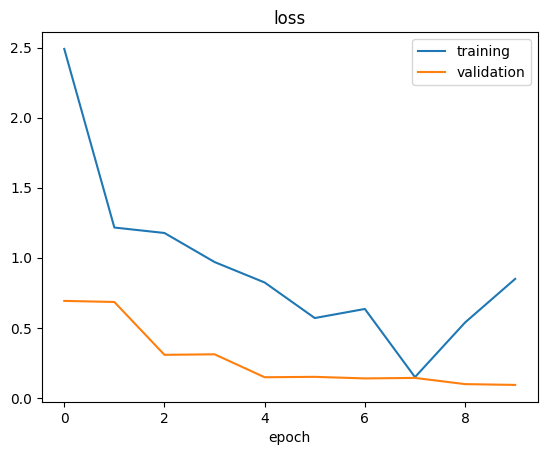

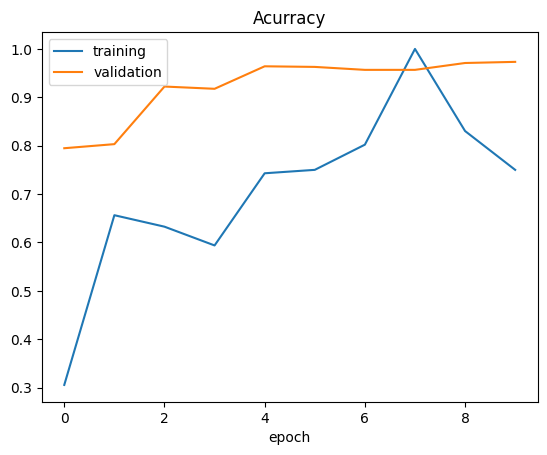

Test Score: 0.09613674879074097
Test Accuracy: 0.9734195470809937
done


In [7]:
model = myModel()
print(model.summary())
history=model.fit(dataGen.flow(X_train,y_train,batch_size=32),steps_per_epoch=len(X_train)//32,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=True)
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])
 
model.save("model.keras")
print('done')
